# **Recupero di dati vettoriali**

## scopo del tutorial
- geocoding / reverse geocoding
- servizi OGC
- capire openstreetmap
- conoscere il modello dei dati openstreetmap
- gestire dati openstreetmap in geopandas

**sorgenti dati**
- [geocoders](https://getlan.lot)
- [repertorio nazioale dei dati territoriali](https://geodati.gov.it/geoportale/)
- [geoportale del Trentino](http://www.territorio.provincia.tn.it/portal/server.pt/community/portale_geocartografico_trentino/254)
- [openstreetmap](https://wiki.openstreetmap.org)


### requisiti
- conoscenza di R
- concetti gis


**status**

*looking for data*

---

# Setup

In [13]:
# Carica i pacchetti necessari
library(tidygeocoder)
library(revgeo)
library(sf)

ERROR: Error in library(revgeo): there is no package called ‘revgeo’


# Geocoding / reverse geocoding

---
**scegliere il giusto servizio**
<br/><br/>

![](https://raw.githubusercontent.com/napo/geospatial_course_unitn/master/images/getlonlat.png)

<br/><br/>
visita [getlon.lat](https://getlon.lat/)

In [3]:
# Crea un dataframe con le città
cities <- data.frame(city = c('Roma', 'Palermo', 'Trento', 'Genova', 'Bari', 'Trieste', 'Napoli', 'Cagliari', 'Messina', 'Lecce'))

# Aggiungi una colonna con l'indirizzo completo per la geocodifica
cities$address <- cities$city

# Esegui la geocodifica utilizzando il provider ArcGIS
geo_cities <- geocode(cities, address = address, method = 'arcgis')

# Converti il risultato in un oggetto sf (Simple Features)
geo_cities_sf <- st_as_sf(geo_cities, coords = c("long", "lat"), crs = 4326)

# Visualizza il risultato
print(geo_cities_sf)


Passing 10 addresses to the ArcGIS single address geocoder

Query completed in: 3.9 seconds



Simple feature collection with 10 features and 2 fields
Geometry type: POINT
Dimension:     XY
Bounding box:  xmin: 8.933989 ymin: 38.11566 xmax: 18.17401 ymax: 46.06667
Geodetic CRS:  WGS 84
# A tibble: 10 × 3
   city     address             geometry
 * <chr>    <chr>            <POINT [°]>
 1 Roma     Roma     (12.49427 41.89056)
 2 Palermo  Palermo  (13.36147 38.11566)
 3 Trento   Trento   (11.11907 46.06667)
 4 Genova   Genova   (8.933989 44.40706)
 5 Bari     Bari     (16.87211 41.12591)
 6 Trieste  Trieste   (13.77852 45.6536)
 7 Napoli   Napoli   (14.25254 40.83998)
 8 Cagliari Cagliari (9.109324 39.21541)
 9 Messina  Messina  (15.55552 38.19233)
10 Lecce    Lecce    (18.17401 40.35329)


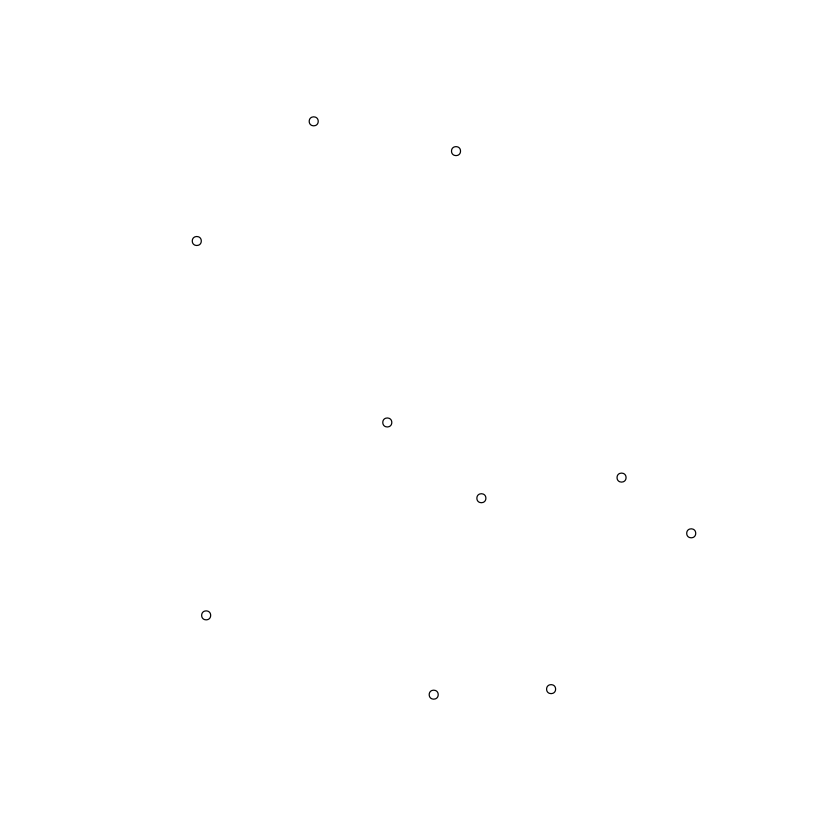

In [6]:
plot(geo_cities_sf$geometry)

In [8]:
# Converti in oggetto sf
geo_cities_sf <- st_as_sf(geo_cities, coords = c("long", "lat"), crs = 4326)

## reverse geocoding

In [9]:
# Prendi il terzo punto
point <- geo_cities_sf[3, ]  # Riga 3

# Ottieni la geometria in formato WKT
point_wkt <- st_as_text(point$geometry)
print(point_wkt)


[1] "POINT (11.11907 46.06667)"


In [10]:

# Ottieni le coordinate x e y
point_coords <- st_coordinates(point)
latlon <- paste(point_coords[2], point_coords[1], sep = ",")


In [11]:
latlon

[1] "46.0666665,11.1190676"

In [12]:

# Esegui la geocodifica inversa
location <- revgeo(
  long = point_coords[1],
  lat = point_coords[2],
  provider = "osm",  # Utilizza OpenStreetMap
  output = "frame"
)


ERROR: Error in revgeo(long = point_coords[1], lat = point_coords[2], provider = "osm", : could not find function "revgeo"


In [ ]:
# Visualizza i risultati
print(location)